<a href="https://colab.research.google.com/github/roop01/scikit-learn/blob/main/01_scikit_learn_beginner_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn


Scikit-Learn is the machine learning package in python. Scikit-learn is a practical tool for implementing machine learning alogorithms. Machine learning is a subset of Artificial Intelligence that trains computers to learn and make predictions by uncovering patterns and insignts in the underlying data. Types of ML:

**Supervised learning:**

* Support Vector Machines
* Linear regression
* Logistic regression
* Naive Bayes
* Linear discriminant analysis
* K-nearest neighbor algorithm
* Neural Networks (Multilayer perceptron)

**Unsupervised learning:**

* K-means for clustering problems
* Apriori algorithm for association rule learning problems.
* Principal Component Analysis (PCA).
* Singular Value Decomposition (SVD).
* Independent Component Analysis (ICA)


Scikit-Learn is a popular ML open source library:

1. Simple and efficient tools for data analysis and modeling
2. Accessible to Python programmers, with focus on clarity
3. Built on NumPy, SciPy and matplotlib for easier integration
4. Wide range of algorithms for tasks like classification, regression, clustering, dimensionality reduction

Machine learning is about creating a machine learning model by training it on some properties of a data set and then testing those properties against another data set.

A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the training set, on which we learn some properties; we call the other set the testing set, on which we test the learned properties.

In scikit-learn, an estimator for classification is a Python object that implements the methods fit(X, y) and predict(T).

Estimator instance is first fitted to the model; that is, it must learn from the model. This is done by passing training set to the fit method.

# Loading Sample Datasets

Scikit-learn provides a variety of sample datasets.

In [19]:
#Load a sample dataset using Scikit-learn:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [20]:
#Explore the features and target values
print(iris_data.data[0])
print(iris_data.target[0])

[5.1 3.5 1.4 0.2]
0


**Data Cleaning**



In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(iris_data.data)

**Feature Scaling**

Inconsistent feature scales can result in algorithms giving undue importance to features with larger scales, thereby affecting the model's performance.

To normalize or standardize the features to bring them onto a similar scale before training these algorithms a scaler method is used.

StandardScaler standardizes features to have mean 0 and variance 1.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_data.data)

**Visualizing the Data**

By visualizing the data beforehand, more informed decisions during the feature selection and model training phases can be made. It allows to spot underlying patterns and trends in the data, identify outliers that may skew model performance, and gain a deeper understanding of the relationships between variables.


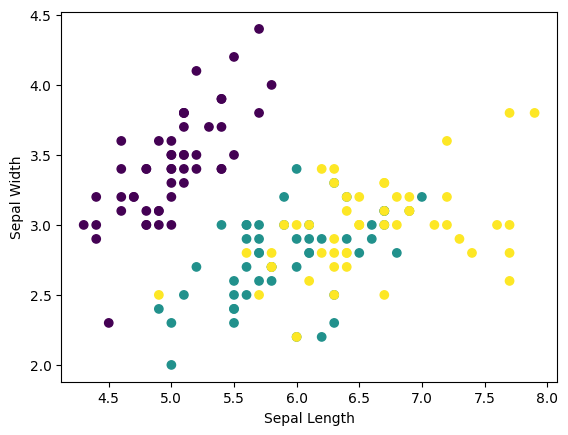

In [23]:
import matplotlib.pyplot as plt
plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=iris_data.target)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Model Selection and Training

Choosing the most appropriate ML alogorithm is the key to building high quality model.

The factors to consider:

1. The size and type of data available for training. Is it a small or large dataset? What kinds of features does it contain - images, text, numerical?
2. The available computing resources. Algorithms differ in their computational complexity. Simple linear models train faster than deep neural networks.
3. The specific problem we want to solve. Are we doing classification, regression, clustering, or something more complex?
4. Any special requirements like the need for interpretability. Linear models are more interpretable than black-box methods.
5. The desired accuracy/performance. Some algorithms simply perform better than others on certain tasks.

For our problem of catergorizing iris flowers, a classification algorithm like Logistic Regression or Support Vector Machine would work well.




**Training a Simple Model**

Train a Logistic Regression model-

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(scaled_data, iris_data.target)

LogisticRegression()

Whether using a simple or more complex algorithm for model training, the Scikit-learn syntax allows for the same approach, reducing the learning curve dramatically. In fact, almost every task using the library can be expressed with the fit/transform/predict paradigm.

# Model Evaluation

**Train/Test Split**


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, iris_data.target)

For classification, key metrics include:

Accuracy: Overall proportion of correct predictions
Precision: Proportion of positive predictions that are actual positives
Recall: Proportion of actual positives predicted positively

This can be computed via Scikit-learn's classification report-

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.83      0.91        18
           2       0.77      1.00      0.87        10

    accuracy                           0.92        38
   macro avg       0.92      0.94      0.93        38
weighted avg       0.94      0.92      0.92        38



# Improving Performance

**Hyperparameter Tuning**

Hyperparameters are model configuration settings. Tuning them can improve performance:


In [27]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(scaled_data, iris_data.target)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

In [28]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, scaled_data, iris_data.target, cv=5)